In [97]:
import numpy as np
import scipy.signal as sig

# Create training and test data for the NN

epochs = 5000
batch_size = 1000

# number of random channels that will be trained and tested on
num_train=epochs*batch_size
num_test=10000
beta=0
# assume we know the channel_length
channel_length = 2

# assume we are working with just real parts
channel_train = np.zeros((num_train,channel_length))
channel_test = np.zeros((num_test,channel_length))

data_length = 100

# BPSK, only real parts
data_train_orig = np.zeros((num_train, data_length+1))
data_train = np.zeros((num_train,data_length+1))
data_test_orig = np.zeros((num_test,data_length+1))
data_test = np.zeros((num_test,data_length+1))

for i in range(0, num_train):
    channel_train[i,:]=np.random.uniform(beta,1,channel_length)
    # if the total power is greater than 1, then normalize
#     if sum(channel_train[i])>=1:
#         channel_train[i] = channel_train[i]/(sum(channel_train[i]))

    # normalize power to 1
    channel_train[i] = channel_train[i]/(np.linalg.norm(channel_train[i]))
    
    data_train_basic = 2*np.random.randint(2,size=data_length)-1
    data_train_orig[i,:]=np.pad(data_train_basic, (0, 1), 'constant')
    data_train[i,:]=sig.convolve(data_train_basic, channel_train[i], mode='full')
    
    if i % 1000000 == 0:
        print(i)
    

for i in range(0, num_test):
    channel_test[i,:]=np.random.uniform(beta,1,channel_length)
    # if the total power is greater than 1, then normalize
#     if sum(channel_test[i])>=1:
#         channel_test[i] = channel_test[i]/(sum(channel_test[i]))

    # normalize power to 1
    channel_test[i] = channel_test[i]/(np.linalg.norm(channel_test[i]))
    
    data_test_basic = 2*np.random.randint(2,size=data_length)-1
    data_test_orig[i,:]=np.pad(data_test_basic, (0, 1), 'constant')
    data_test[i,:]=sig.convolve(data_test_basic, channel_test[i], mode='full')


0
1000000
2000000
3000000
4000000


In [24]:
# # save data to file
# dat = np.array([channel_train, data_train_orig, data_train,channel_test,data_test_orig, data_test])

# np.savetxt("equalization_data.csv", dat, delimiter=',', 
#            header="channel_train,data_train_orig,data_train,channel_test,data_test_orig,data_test", comments="",
#           fmt='%5s')

# np.savetxt("equalization_data_channel_train.csv", channel_train, delimiter=',', 
#            header="channel_train", comments="",
#           fmt='%5s')

# np.savetxt("equalization_data_train_orig.csv", data_train_orig, delimiter=',', 
#            header="data_train_orig", comments="",
#           fmt='%5s')

# np.savetxt("equalization_data_train.csv", data_train, delimiter=',', 
#            header="data_train", comments="",
#           fmt='%5s')

# np.savetxt("equalization_data_channel_test.csv", channel_test, delimiter=',', 
#            header="channel_test", comments="",
#           fmt='%5s')

# np.savetxt("equalization_data_test_orig.csv", data_test_orig, delimiter=',', 
#            header="data_test_orig", comments="",
#           fmt='%5s')

# np.savetxt("equalization_data_test.csv", data_test, delimiter=',', 
#            header="data_test", comments="",
#           fmt='%5s')

In [28]:
# load data from file
channel_train.shape

(20000000, 2)

In [2]:
# Function to zero force equalize. 
def zfEqualize(channel_output, channel):
    # make sure have same fft length 
    # we get the correct number of terms as this is like a circular convolution so the last packet is garbage
    freq_domain = np.fft.fft(channel_output, len(channel_output))/np.fft.fft(channel, len(channel_output))
    return np.fft.ifft(freq_domain)[0:len(channel_output) - len(channel) + 1]

In [3]:
import numpy as np
from numpy import linalg as LA

def mse(channel_output,channel):
    
    # construct the upper diagonal matrix X to represent the channel matrix
    data_length = channel_output.shape[0]
    channel_length = channel.shape[0]
    X=np.zeros((data_length,data_length))
    # for each row in the matrix
    for i in range(0,data_length):
        # for every channel tap
        for j in range(0,channel_length):
            if i-j>=0:
                X[i,i-j]=channel[j]
                
    
    data_est = np.dot(LA.pinv(X),channel_output)
    
    return data_est

## Feedforward NN

/home/laura/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Channel:  [0.4188703 0.5811297]
J: 264
Channel:  [0.41854914 0.58145086]
J: 396
Channel:  [0.41819257 0.58180743]
J: 773
Channel:  [0.41717351 0.58282649]
J: 4039
Channel:  [0.418347 0.581653]
J: 5126
Channel:  [0.41874876 0.58125124]
J: 7097
Channel:  [0.42055471 0.57944529]
J: 9328
Epoch 0, Train Cost 1.3801692724227905, Test Cost: 1.1400741338729858
Epoch 100, Train Cost 0.7306469678878784, Test Cost: 0.729392409324646
Epoch 200, Train Cost 0.4730326533317566, Test Cost: 0.47331786155700684
Epoch 300, Train Cost 0.3710201382637024, Test Cost: 0.36806797981262207
Epoch 400, Train Cost 0.33356624841690063, Test Cost: 0.33208248019218445
Epoch 500, Train Cost 0.32235512137413025, Test Cost: 0.3196880519390106
Epoch 600, Train Cost 0.31566303968429565, Test Cost: 0.3141036331653595
Epoch 700, Train Cost 0.30915144085884094, Test Cost: 0.3113385736942291
Epoch 800, Train Cost 0.3170083165168762, Test Cost: 0.3097098767757416
Epoch 900, Train Cost 0.3091709315776825, Test Cost: 0.30848509

Epoch 10700, Train Cost 0.07836797833442688, Test Cost: 0.07794845849275589
Epoch 10800, Train Cost 0.07449225336313248, Test Cost: 0.0775323286652565
Epoch 10900, Train Cost 0.07496731728315353, Test Cost: 0.07672787457704544
Epoch 11000, Train Cost 0.07580682635307312, Test Cost: 0.0763668492436409
Epoch 11100, Train Cost 0.07758019119501114, Test Cost: 0.07571492344141006
Epoch 11200, Train Cost 0.07462021708488464, Test Cost: 0.07534073293209076
Epoch 11300, Train Cost 0.07346675544977188, Test Cost: 0.0747889056801796
Epoch 11400, Train Cost 0.07694906741380692, Test Cost: 0.07432438433170319
Epoch 11500, Train Cost 0.07303356379270554, Test Cost: 0.07399647682905197
Epoch 11600, Train Cost 0.07412112504243851, Test Cost: 0.07340344786643982
Epoch 11700, Train Cost 0.0722765177488327, Test Cost: 0.07321881502866745
Epoch 11800, Train Cost 0.07418058067560196, Test Cost: 0.0725221112370491
Epoch 11900, Train Cost 0.0709860697388649, Test Cost: 0.07168307900428772
Epoch 12000, Train

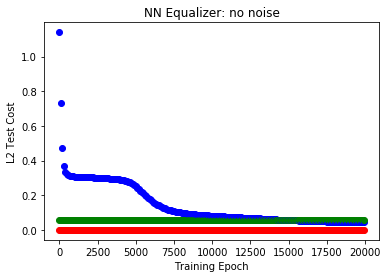

In [4]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# fix random seed for reproducibility
np.random.seed()

m = data_length+1 # length of input
learning_rate = 0.001
decay = 1 - 10*1e-10

data_length=100


# declare the training data placeholders
# input x
data = tf.placeholder(tf.float32, [None, m])
channel = tf.placeholder(tf.float32, [None, channel_length])
data_orig = tf.placeholder(tf.float32, [None,m])


data_channel = tf.concat([data, channel], 1)

layer_1 = tf.layers.dense(
  data_channel, 400, tf.nn.sigmoid, use_bias=True)
layer_2 = tf.layers.dense(
  layer_1, 400, tf.nn.sigmoid, use_bias=True)
layer_3 = tf.layers.dense(
  layer_2, m, activation=tf.identity, use_bias=True)

est_data = layer_3


adaptive_learning_rate = tf.placeholder_with_default(learning_rate, [])

estimation_cost = tf.losses.mean_squared_error(data_orig, est_data)

optimizer = tf.train.AdamOptimizer(learning_rate=adaptive_learning_rate).minimize(estimation_cost)
                                                                                  
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

plt.figure()

# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    mc_losses = []
    
    # compare to zero force equalizer and MSE
    zero_force_error = 0
    mse_error = 0
    for j in range(num_test):
        zero_force_est = zfEqualize(data_test[j], channel_test[j])
        zero_force_error = zero_force_error+LA.norm(np.pad(zero_force_est, (0, 1), 'constant')-
                                                    data_test_orig[j])
        mse_est = mse(data_test[j], channel_test[j])
        mse_error = mse_error+LA.norm(mse_est[:-1]-data_test_orig[j,:-1])
        if (LA.norm(mse_est[:-1]-data_test_orig[j,:-1]))>1:
            print("Channel: ",channel_test[j])
            print("J:", j)

    zero_force_error = zero_force_error / num_test
    mse_error = mse_error / num_test
        
    for epoch in range(epochs):
        
        current_start = epoch*batch_size
        channel_train_batch = channel_train[current_start:(current_start+batch_size),:]
        data_train_batch = data_train[current_start:(current_start+batch_size),:]
        data_train_orig_batch = data_train_orig[current_start:(current_start+batch_size),:]
        
            
        _,cost,est_data_batch = sess.run([optimizer, estimation_cost, est_data], 
                                          feed_dict={data: data_train_batch, 
                                                     channel: channel_train_batch,
                                                     data_orig: data_train_orig_batch})    

        if epoch % 100 == 0: 
            
            
            mc_cost, mc_estimation = sess.run([estimation_cost, est_data], 
                                             feed_dict={data: data_test, 
                                                        channel: channel_test,
                                                        data_orig: data_test_orig})
            
            
            plt.plot(epoch, mc_cost, 'bo')
            plt.plot(epoch, zero_force_error, 'ro')
            plt.plot(epoch, mse_error, 'go')
            print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))
            

plt.xlabel('Training Epoch')
plt.ylabel('L2 Test Cost')
plt.title('NN Equalizer: no noise')
# plt.text(1000, .025, r'NN equalizer')
# plt.text(0.5, .025, r'Zero Force equalizer')
plt.show()


In [5]:
g=mse(data_test[0], channel_test[0])
print(g)
print(data_test_orig[0])

[ 1.00000000e+00  1.00000000e+00 -1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00  1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00  1.00000000e+00  1.00000000e+00
 -1.00000000e+00  1.00000000e+00 -1.00000000e+00  1.00000000e+00
 -1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
 -1.00000000e+00  1.00000000e+00 -1.00000000e+00  1.00000000e+00
  1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00  1.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -1.00000000e+00  1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  1.00000000e+00 -1.00000000e+00 -1.00000000e+00  1.00000000e+00
  1.00000000e+00 -1.00000000e+00  1.00000000e+00 -1.00000000e+00
 -1.00000000e+00  1.00000

## Feedforward NN with Noise

Epoch 0, Train Cost 1.4567053318023682, Test Cost: 1.1949955224990845
Epoch 100, Train Cost 0.9898567199707031, Test Cost: 0.990533709526062
Epoch 200, Train Cost 0.9879760146141052, Test Cost: 0.9887742400169373
Epoch 300, Train Cost 0.9888446927070618, Test Cost: 0.9880537390708923
Epoch 400, Train Cost 0.9881919622421265, Test Cost: 0.98780757188797
Epoch 500, Train Cost 0.9877060651779175, Test Cost: 0.9875593781471252
Epoch 600, Train Cost 0.9871875643730164, Test Cost: 0.987224817276001
Epoch 700, Train Cost 0.9875645041465759, Test Cost: 0.987010657787323
Epoch 800, Train Cost 0.9873607754707336, Test Cost: 0.9869758486747742
Epoch 900, Train Cost 0.9869006872177124, Test Cost: 0.9869903326034546
Epoch 1000, Train Cost 0.9861148595809937, Test Cost: 0.9868617057800293
Epoch 1100, Train Cost 0.9854030013084412, Test Cost: 0.9866420030593872
Epoch 1200, Train Cost 0.9868545532226562, Test Cost: 0.9868025779724121
Epoch 1300, Train Cost 0.9869807958602905, Test Cost: 0.986627519130

Epoch 11300, Train Cost 0.9862800240516663, Test Cost: 0.9867323040962219
Epoch 11400, Train Cost 0.9863405823707581, Test Cost: 0.986685037612915
Epoch 11500, Train Cost 0.9867051243782043, Test Cost: 0.9866952896118164
Epoch 11600, Train Cost 0.9867867231369019, Test Cost: 0.9866767525672913
Epoch 11700, Train Cost 0.9868544936180115, Test Cost: 0.9867469072341919
Epoch 11800, Train Cost 0.987047553062439, Test Cost: 0.9867112040519714
Epoch 11900, Train Cost 0.9864842295646667, Test Cost: 0.9866772890090942
Epoch 12000, Train Cost 0.9867309927940369, Test Cost: 0.9866078495979309
Epoch 12100, Train Cost 0.986824631690979, Test Cost: 0.9866783022880554
Epoch 12200, Train Cost 0.9860445261001587, Test Cost: 0.9866640567779541
Epoch 12300, Train Cost 0.9872945547103882, Test Cost: 0.9867021441459656
Epoch 12400, Train Cost 0.9861367344856262, Test Cost: 0.986692488193512
Epoch 12500, Train Cost 0.9858496189117432, Test Cost: 0.9866633415222168
Epoch 12600, Train Cost 0.9858770966529846

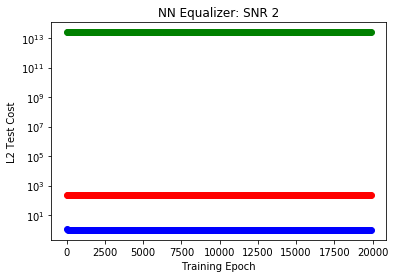

Epoch 0, Train Cost 1.5024652481079102, Test Cost: 1.22542142868042
Epoch 100, Train Cost 0.9797917604446411, Test Cost: 0.9799242615699768
Epoch 200, Train Cost 0.9758505821228027, Test Cost: 0.9758360385894775
Epoch 300, Train Cost 0.97453373670578, Test Cost: 0.9746341705322266
Epoch 400, Train Cost 0.9736316800117493, Test Cost: 0.9742233753204346
Epoch 500, Train Cost 0.9754161238670349, Test Cost: 0.9742210507392883
Epoch 600, Train Cost 0.9730789065361023, Test Cost: 0.9734845161437988
Epoch 700, Train Cost 0.9733383059501648, Test Cost: 0.9734369516372681
Epoch 800, Train Cost 0.9731249809265137, Test Cost: 0.9732106328010559
Epoch 900, Train Cost 0.9747772216796875, Test Cost: 0.9734035730361938
Epoch 1000, Train Cost 0.9735167026519775, Test Cost: 0.9732633829116821
Epoch 1100, Train Cost 0.9736291170120239, Test Cost: 0.9732060432434082
Epoch 1200, Train Cost 0.9723992943763733, Test Cost: 0.9731701612472534
Epoch 1300, Train Cost 0.9731997847557068, Test Cost: 0.97308522462

KeyboardInterrupt: 

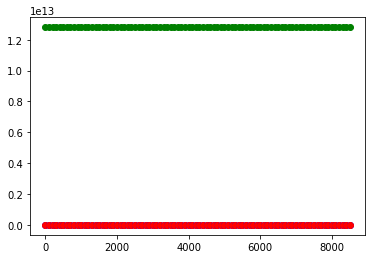

In [6]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# fix random seed for reproducibility
np.random.seed()

m = data_length+1 # length of input
learning_rate = 0.001
decay = 1 - 10*1e-10

# add noise to data
SNR_vec = np.arange(0.1,2.1,0.1)
mse_SNR = np.zeros((SNR_vec.shape[0],1))
zf_SNR = np.zeros((SNR_vec.shape[0],1))
NN_SNR = np.zeros((SNR_vec.shape[0],1))

for snr_val in range(0,SNR_vec.shape[0]):


    SNR = SNR_vec[snr_val]
    noise_amp = 1/SNR
    # declare the training data placeholders
    # input x
    data = tf.placeholder(tf.float32, [None, m])
    channel = tf.placeholder(tf.float32, [None, channel_length])
    data_orig = tf.placeholder(tf.float32, [None,m])


    data_channel = tf.concat([data, channel], 1)

    layer_1 = tf.layers.dense(
      data_channel, 400, tf.nn.sigmoid, use_bias=True)
    layer_2 = tf.layers.dense(
      layer_1, 400, tf.nn.sigmoid, use_bias=True)
    layer_3 = tf.layers.dense(
      layer_2, m, activation=tf.identity, use_bias=True)

    est_data = layer_3


    adaptive_learning_rate = tf.placeholder_with_default(learning_rate, [])

    estimation_cost = tf.losses.mean_squared_error(data_orig, est_data)

    optimizer = tf.train.AdamOptimizer(learning_rate=adaptive_learning_rate).minimize(estimation_cost)

    # finally setup the initialisation operator
    init_op = tf.global_variables_initializer()

    plt.figure()

    # start the session
    with tf.Session() as sess:
        #    initialize the variables
        sess.run(init_op)
        mc_losses = []

        # add noise to data
        noise = noise_amp*np.random.randn(num_test,data_length+1)
        data_test_noise = data_test+noise

        # compare to zero force equalizer and MSE
        zero_force_error = 0
        mse_error = 0
        for j in range(num_test):
            zero_force_est = zfEqualize(data_test_noise[j], channel_test[j])
            zero_force_error = zero_force_error+LA.norm(np.pad(zero_force_est, (0, 1), 'constant')-
                                                        data_test_orig[j])
            mse_est = mse(data_test_noise[j], channel_test[j])
            mse_error = mse_error+LA.norm(mse_est[:-1]-data_test_orig[j,:-1])

        zero_force_error = zero_force_error / num_test
        mse_error = mse_error / num_test

        for epoch in range(epochs):

            current_start = epoch*batch_size
            channel_train_batch = channel_train[current_start:(current_start+batch_size),:]
            data_train_batch = data_train[current_start:(current_start+batch_size),:]
            data_train_orig_batch = data_train_orig[current_start:(current_start+batch_size),:]


            # add noise to data
            noise = noise_amp*np.random.randn(batch_size,data_length+1)
            data_train_batch_noise = data_train_batch+noise

            _,cost,est_data_batch = sess.run([optimizer, estimation_cost, est_data], 
                                              feed_dict={data: data_train_batch_noise, 
                                                         channel: channel_train_batch,
                                                         data_orig: data_train_orig_batch})    

            if epoch % 100 == 0: 

                mc_cost, mc_estimation = sess.run([estimation_cost, est_data], 
                                                 feed_dict={data: data_test_noise, 
                                                            channel: channel_test,
                                                            data_orig: data_test_orig})


                plt.plot(epoch, mc_cost, 'bo')
                plt.plot(epoch, zero_force_error, 'ro')
                plt.plot(epoch, mse_error, 'go')
                print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))

    mse_SNR[snr_val]=mse_error
    zf_SNR[snr_val]=zero_force_error
    NN_SNR[snr_val]=mc_cost


    plt.xlabel('Training Epoch')
    plt.ylabel('L2 Test Cost')
    plt.title('NN Equalizer: SNR 2')
    plt.yscale('log')
    # plt.text(0, 0, r'NN equalizer')
    # plt.text(0.5, .025, r'Zero Force equalizer')
    # plt.legend(loc='best')
    plt.show()    

In [ ]:
plt.xlabel('SNR')
plt.ylabel('L2 Test Cost')
plt.yscale('log')
# plt.text(0, 0, r'NN equalizer')
# plt.text(0.5, .025, r'Zero Force equalizer')

SNR_log = 10*np.log10(SNR_vec)

plt.plot(SNR_log,mse_SNR, label='MSE')
plt.plot(SNR_log,zf_SNR, label='ZF')
plt.plot(SNR_log,NN_SNR, label='NN')

plt.legend(loc='best')

plt.show()

In [ ]:
g=mse(data_test_noise[0], channel_test[0])
print(g)
print(data_test_orig[0])
LA.norm(g[:-1]-data_test_orig[0,:-1])

In [141]:
from scipy.interpolate import griddata

def gen_data_for_plot(sess, outputs, inputs, preamble=None):
    n = 300
    if preamble is None:
        n_repeat = 10
        preambles = [gen_preamble() for _ in range(n_repeat)]
    else:
        n_repeat = 1
        preambles = [preamble]
    rad = np.linspace(0, 0.5*np.pi, n)
    channels = np.vstack((np.cos(rad),np.sin(rad))).T
    snrs = np.logspace(-4,4,20)
    errors_nn = np.zeros((n*len(snrs)))
    errors_ls = np.zeros((n*len(snrs)))
    channel_x = np.zeros((n*len(snrs)))
    channel_y = np.zeros((n*len(snrs)))
    for i in range(len(snrs)):
        for preamble in preambles:
            s = snrs[i]
            received = apply_channel(channels, preamble, snr=s)
            received_ = received[:,:-1].reshape((n,100,1))
            channel_hat_nn = sess.run(outputs[0], feed_dict={inputs[0]:preamble.reshape((1, 100, 1)),
                                 inputs[1]:received_})
            for j in range(len(received)):
                channel_hat_ls[j] = LS_channel_est(preamble, received[j])

            errors_nn[i*n:(i+1)*n] += np.mean((channel_hat_nn - channels)**2,axis=1)
            errors_ls[i*n:(i+1)*n] += np.mean((channel_hat_ls - channels)**2,axis=1)
        errors_nn[i*n:(i+1)*n] /= n_repeat
        errors_ls[i*n:(i+1)*n] /= n_repeat

        channel_x[i*n:(i+1)*n] = channels[:,0]*s
        channel_y[i*n:(i+1)*n] = channels[:,1]*s
    
    return channel_x, channel_y, errors_nn, errors_ls
        
def heat_plot(channel_x, channel_y, errors_zf, errors_nneq):
    X = channel_x
    Y = channel_y
    Z1 = np.log10(errors_zf)
    Z2 = np.log10(errors_nneq)
    # create x-y points to be used in heatmap
    xi = np.logspace(-4, 4,100)
    yi = np.logspace(-4, 4,100)

    # Z is a matrix of x-y values
    zi1 = griddata((X, Y), Z1, (xi[None,:], yi[:,None]), method='linear')
    zi2 = griddata((X, Y), Z2, (xi[None,:], yi[:,None]), method='linear')

    # direction = channel, radius = SNR
    f, ax = plt.subplots(1, 2, figsize = (8*2, 6),sharex=True,sharey=True)
    ax[0].set_title('Zero Force equalizer L2 error, log scale')
    ax[1].set_title('NN equalizer L2 error, log scale')
    CS1 = ax[0].contourf(xi, yi, zi1, 15, cmap=plt.cm.rainbow, vmin=-10, vmax=2)
    CS2 = ax[1].contourf(xi, yi, zi2, 15, cmap=plt.cm.rainbow, vmin=-10, vmax=2)

    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')

    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    f.colorbar(CS1, cax=cbar_ax)

    ax[0].set_xlabel("(tap 1 value) x (channel SNR), log scale")
    ax[1].set_xlabel("(tap 1 value) x (channel SNR), log scale")
    ax[0].set_ylabel("(tap 2 value) x (channel SNR), log scale")
    ax[1].set_ylabel("(tap 2 value) x (channel SNR), log scale")


    plt.show()
    plt.close()

In [55]:
def apply_channel(channel, data, snr=-1):
    ret = sig.convolve(data, channel, mode='full')
    if snr > 0:
        ret += (1./np.sqrt(snr)) * np.random.randn(len(ret))
    return ret

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


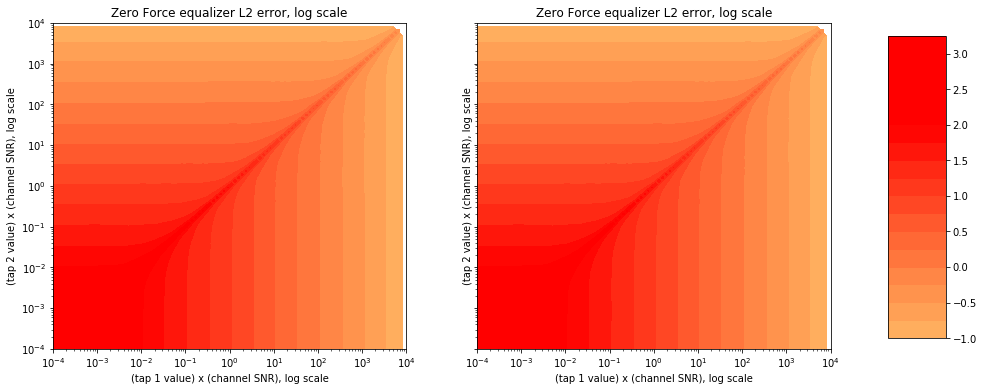

In [89]:
# generate heat plot for zero force equalizer
n = 300 # number of channels
m = 100 # number of tests for each SNR to be averaged

rad = np.linspace(0, 0.5*np.pi, n)
channels = np.vstack((np.cos(rad),np.sin(rad))).T
snrs = np.logspace(-4,4,20)
errors_zf = np.zeros((n*len(snrs)))
channel_x = np.zeros((n*len(snrs)))
channel_y = np.zeros((n*len(snrs)))

data_length=100
data_heat_map_orig = 2*np.random.randint(2,size=data_length)-1
data_heat_map = np.zeros((n,data_length))
for j in range(0,n):
    data_heat_map[j,:] = data_heat_map_orig

for i in range(len(snrs)):
    s = snrs[i]
    for k in range(0,n):
        current_channel = channels[k,:]
        err = 0
        for j in range(0,m):
            received = apply_channel(current_channel, data_heat_map_orig, snr=s)
            received_ = received[:-1].reshape((100,1))
            zf_est = zfEqualize(received, current_channel)
            err = err + np.linalg.norm(zf_est-data_heat_map_orig)
        errors_zf[i*n+k] = err/m
#         received_ = received[:,:-1].reshape((n,100,1))
#         channel_hat_nn = sess.run(outputs[0], feed_dict={inputs[0]:preamble.reshape((1, 100, 1)),
#                              inputs[1]:received_})
#         for j in range(len(received)):
#             channel_hat_ls[j] = LS_channel_est(preamble, received[j])

#         errors_nn[i*n:(i+1)*n] += np.mean((channel_hat_nn - channels)**2,axis=1)
#         errors_ls[i*n:(i+1)*n] += np.mean((channel_hat_ls - channels)**2,axis=1)
#     errors_nn[i*n:(i+1)*n] /= n_repeat
#     errors_ls[i*n:(i+1)*n] /= n_repeat

    channel_x[i*n:(i+1)*n] = channels[:,0]*s
    channel_y[i*n:(i+1)*n] = channels[:,1]*s


# zfEqualize(channel_output, channel):

heat_plot(channel_x, channel_y, errors_zf)

0.10778648544974934

In [127]:
def train_eq_nn(data_length, channel_length, channel_train, data_train, data_train_orig,
               channel_test,data_test, data_test_orig,errors_nneq,channels_heat_map,data_heat_map_orig,i):
    
    m=data_length+1
    
    learning_rate = 0.001
    decay = 1 - 10*1e-10

    # declare the training data placeholders
    # input x
    data = tf.placeholder(tf.float32, [None, m])
    channel = tf.placeholder(tf.float32, [None, channel_length])
    data_orig = tf.placeholder(tf.float32, [None,m])


    data_channel = tf.concat([data, channel], 1)

    layer_1 = tf.layers.dense(
      data_channel, 400, tf.nn.sigmoid, use_bias=True)
    layer_2 = tf.layers.dense(
      layer_1, 400, tf.nn.sigmoid, use_bias=True)
    layer_3 = tf.layers.dense(
      layer_2, m, activation=tf.identity, use_bias=True)

    est_data = layer_3


    adaptive_learning_rate = tf.placeholder_with_default(learning_rate, [])

    estimation_cost = tf.losses.mean_squared_error(data_orig, est_data)

    optimizer = tf.train.AdamOptimizer(learning_rate=adaptive_learning_rate).minimize(estimation_cost)

    # finally setup the initialisation operator
    init_op = tf.global_variables_initializer()

#     plt.figure()

    # start the session
    with tf.Session() as sess:
        #    initialize the variables
        sess.run(init_op)
        mc_losses = []

        for epoch in range(epochs):

            current_start = epoch*batch_size
            channel_train_batch = channel_train[current_start:(current_start+batch_size),:]
            data_train_batch = data_train[current_start:(current_start+batch_size),:]
            data_train_orig_batch = data_train_orig[current_start:(current_start+batch_size),:]


            _,cost,est_data_batch = sess.run([optimizer, estimation_cost, est_data], 
                                              feed_dict={data: data_train_batch, 
                                                         channel: channel_train_batch,
                                                         data_orig: data_train_orig_batch})    

            if epoch % 1000 == 0: 


                mc_cost, mc_estimation = sess.run([estimation_cost, est_data], 
                                                 feed_dict={data: data_test, 
                                                            channel: channel_test,
                                                            data_orig: data_test_orig})
                print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))

#         # TEST OVER THE HEAT MAP SPACE
        
        data_heat_map_nn = np.pad(data_heat_map_orig, (0, 1), 'constant').reshape((1,101))
        
        for k in range(0,n):
            current_channel = channels_heat_map[k,:]
            err = 0
            for j in range(0,100): # average error over 100 trials
                received = apply_channel(current_channel, data_heat_map_orig, snr=s)
#                 received_ = received[:-1].reshape((100,1))
                current_channel_nn = current_channel.reshape((1,2))
                received = received.reshape((1,101))
                nn_eq_cost = sess.run([estimation_cost], 
                                                 feed_dict={data: received, 
                                                            channel: current_channel_nn,
                                                            data_orig: data_heat_map_nn})
#             print(nn_eq_cost)
                err = err + nn_eq_cost[0]
            errors_nneq[i*n+k] = err/100
    
    return errors_nneq

In [126]:
train_eq_nn(data_length, channel_length, channel_train, data_train, data_train_orig,
               channel_test,data_test, data_test_orig,errors_nneq,channels,data_heat_map_orig,0)

Epoch 0, Train Cost 1.5067744255065918, Test Cost: 1.2196006774902344
Epoch 1000, Train Cost 0.29972341656684875, Test Cost: 0.30464068055152893
Epoch 2000, Train Cost 0.3009513020515442, Test Cost: 0.29882460832595825
Epoch 3000, Train Cost 0.296531081199646, Test Cost: 0.293803334236145
Epoch 4000, Train Cost 0.27686071395874023, Test Cost: 0.27853623032569885


array([0.04964934, 0.05188057, 0.04752559, ..., 0.        , 0.        ,
       0.        ])

In [110]:
np.pad(data_heat_map_orig, (0, 1), 'constant').reshape((1,101)).shape

(1, 101)

SNR:  0
Epoch 0, Train Cost 1.3204480409622192, Test Cost: 1.1189594268798828
Epoch 1000, Train Cost 0.99045729637146, Test Cost: 0.9905340075492859
Epoch 2000, Train Cost 0.9903977513313293, Test Cost: 0.9904950857162476
Epoch 3000, Train Cost 0.9906266331672668, Test Cost: 0.990568220615387
Epoch 4000, Train Cost 0.9906854629516602, Test Cost: 0.9905421137809753
SNR:  1
Epoch 0, Train Cost 1.5100879669189453, Test Cost: 1.231576681137085
Epoch 1000, Train Cost 0.9904263019561768, Test Cost: 0.9905475974082947
Epoch 2000, Train Cost 0.9903097748756409, Test Cost: 0.9905045628547668
Epoch 3000, Train Cost 0.9907284379005432, Test Cost: 0.9905415773391724
Epoch 4000, Train Cost 0.9905391335487366, Test Cost: 0.9905055165290833
SNR:  2
Epoch 0, Train Cost 1.4877194166183472, Test Cost: 1.1962400674819946
Epoch 1000, Train Cost 0.9905321598052979, Test Cost: 0.9905247688293457
Epoch 2000, Train Cost 0.9900094270706177, Test Cost: 0.9903655648231506
Epoch 3000, Train Cost 0.990386605262756

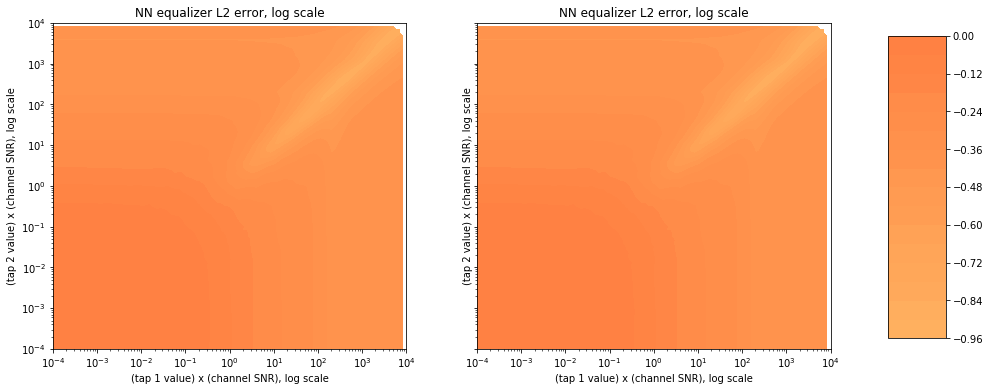

In [140]:

# generate heat plot for NN equalizer
n = 300 # number of channels
# m = 100 # number of tests for each SNR to be averaged

rad = np.linspace(0, 0.5*np.pi, n)
channels = np.vstack((np.cos(rad),np.sin(rad))).T
snrs = np.logspace(-4,4,20)
errors_nneq = np.zeros((n*len(snrs)))
channel_x = np.zeros((n*len(snrs)))
channel_y = np.zeros((n*len(snrs)))

data_length=100
data_heat_map_orig = 2*np.random.randint(2,size=data_length)-1

for i in range(len(snrs)):
    s = snrs[i]
    print("SNR: ",i)
    
    # add noise to data_train, data_test
    if s > 0:
        data_train_noise = data_train + (1./np.sqrt(s)) * np.random.randn(epochs*batch_size,data_length+1)
        data_test_noise = data_test + (1./np.sqrt(s)) * np.random.randn(num_test,data_length+1)
    
    errors_nneq = train_eq_nn(data_length, channel_length, channel_train, data_train_noise, data_train_orig,
               channel_test,data_test_noise, data_test_orig,errors_nneq,channels,data_heat_map_orig,i)

    channel_x[i*n:(i+1)*n] = channels[:,0]*s
    channel_y[i*n:(i+1)*n] = channels[:,1]*s


# zfEqualize(channel_output, channel):

heat_plot(channel_x, channel_y, errors_nneq)



# errors_nneq = train_eq_nn(data_length, channel_length, channel_train, data_train, data_train_orig,
#                channel_test,data_test, data_test_orig, errors_nneq)

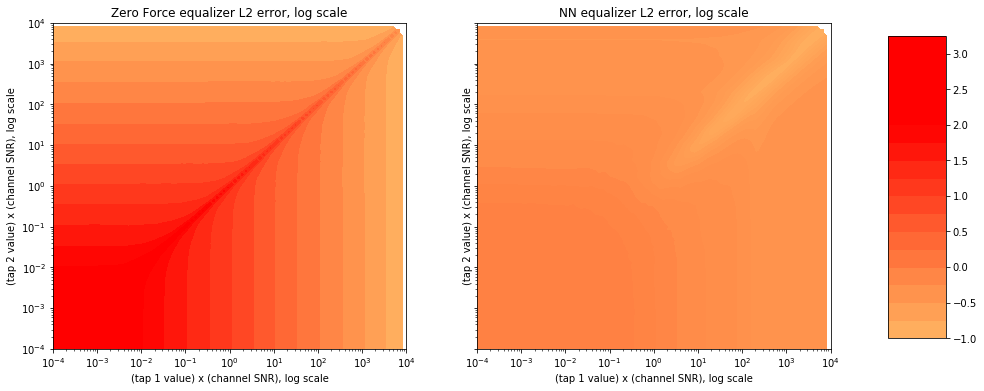

In [142]:
heat_plot(channel_x, channel_y, errors_zf,errors_nneq)

# Channel Inversion NN

In [196]:
# apply channel inversion to data

def apply_inversion(channel_inverse, data):
    ntaps = channel_inverse.shape[0] # number of taps
    ndata = data.shape[0] # length of data
    
#     print(channel_inverse.shape)
#     print(data.shape)
    
    # add zeros to beginning of data for inversion purposes
    zero_array = np.zeros((ntaps-1,1))
    data_pad = np.append(zero_array, data)
    
    # let the first ntaps-1 be zero
    inv_data = np.zeros((ndata+ntaps-1,1))
    for j in range(ntaps-1,ndata+ntaps-1):
        sum_over_taps=data_pad[j]*channel_inverse[0] # add the channel0*data
        for i in range(1,ntaps):
            # then also add previously determined inv_data*channel1+
            sum_over_taps = sum_over_taps + inv_data[j-i]*channel_inverse[i]
#         print(sum_over_taps.shape)
        inv_data[j]=sum_over_taps
    
    return inv_data[1:-1]

In [161]:
c = np.array([.7,0.2])
c_inv = np.array([1/c[0],-c[1]])

data = np.array([1,1,0,0,1])
data_conv = sig.convolve(data, c_inv, mode='full')
print(data_conv)

apply_inversion(c,data_conv)

[ 1.42857143  1.22857143 -0.2         0.          1.42857143 -0.2       ]


array([[1.     ],
       [1.06   ],
       [0.072  ],
       [0.0144 ],
       [1.00288]])

## Heat map over NN inversion architecture

In [221]:
def heat_map_inversion_error(data_heat_map_orig, channels_heat_map, snrs):

    
    import numpy as np
    from numpy import linalg as LA
    import tensorflow as tf
    import matplotlib.pyplot as plt
    %matplotlib inline
    # fix random seed for reproducibility
    np.random.seed()
    
    errors_nninv = np.zeros((n*len(snrs)))
    channel_x = np.zeros((n*len(snrs)))
    channel_y = np.zeros((n*len(snrs)))

    num_taps = 2 # of consecutive taps
    learning_rate = 0.001
    epochs = 200000
    batch_size = 1000
    decay = 1 - 10*1e-10
    beta = 0.01


    # declare the training data placeholders
    # input x
    real_channel = tf.placeholder(tf.float32, [None, num_taps])
    real_inverse = tf.placeholder(tf.float32, [None, num_taps])

    layer_1 = tf.layers.dense(
      real_channel, 8, tf.nn.sigmoid, use_bias=True)
    # layer_2 = tf.layers.dense(
    #   layer_1, 150, tf.nn.tanh, use_bias=True)
    layer_3 = tf.layers.dense(
      layer_1, num_taps, activation=tf.identity, use_bias=True)

    inverse_channel = layer_3


    adaptive_learning_rate = tf.placeholder_with_default(learning_rate, [])

    inversion_cost = tf.losses.mean_squared_error(real_inverse, inverse_channel)

    optimizer = tf.train.AdamOptimizer(learning_rate=adaptive_learning_rate).minimize(inversion_cost)

    # finally setup the initialisation operator
    init_op = tf.global_variables_initializer()

    plt.figure()

    # start the session
    with tf.Session() as sess:
        #    initialize the variables
        sess.run(init_op)
        mc_losses = []

        # create testing data
        channel_inv_test = np.zeros((num_test,num_taps))
        inverse_inv_test =np.zeros((num_test,num_taps))

        for i in range(0, batch_size):
            channel_inv_test[i,:]=np.random.uniform(beta,1,num_taps)
            # normalize power
            channel_inv_test[i] = channel_inv_test[i]/(np.linalg.norm(channel_inv_test[i]))

            inverse_inv_test[i,0] = 1/channel_inv_test[i,0]
            for j in range(1, num_taps):
                inverse_inv_test[i,j] = -channel_inv_test[i,j]

        for epoch in range(epochs):

            # assume we are working with just real parts
            batch_channel_inv_train = np.zeros((batch_size,num_taps))
            batch_inverse_inv_train = np.zeros((batch_size,num_taps))

            for i in range(0, batch_size):
                batch_channel_inv_train[i,:]=np.random.uniform(beta,1,num_taps)
                # normalize power
                batch_channel_inv_train[i] = (batch_channel_inv_train[i]/
                                              (np.linalg.norm(batch_channel_inv_train[i])))

                batch_inverse_inv_train[i,0] = 1/batch_channel_inv_train[i,0]
                for j in range(1, num_taps):
                    batch_inverse_inv_train[i,j] = -batch_channel_inv_train[i,j]

    #         channel_batch = [1,0]
    #         real_inv_batch = [1,0]
    #         for rand in range(0,batch_size-1):
    #             rand_int = np.random.randint(0,num_train)
    #             channel_batch = np.vstack((channel_batch, channel_train[rand_int]))
    #             real_inv_batch = np.vstack((real_inv_batch, inverse_train[rand_int]))

    #         channel_batch = channel_batch.reshape((batch_size, num_taps))
    #         real_inv_batch = real_inv_batch.reshape((batch_size, num_taps))

            _,cost,inverse_channel2 = sess.run([optimizer, inversion_cost, inverse_channel], 
                                              feed_dict={real_channel: batch_channel_inv_train, 
                                                         real_inverse: batch_inverse_inv_train,
                             adaptive_learning_rate: learning_rate * (decay**epoch)})
    #         print(LA.norm(real_inv_batch-inverse_channel))


            if epoch % 1000 == 0: 
    #             plt.plot(epoch, cost, 'bo')
                mc_cost, mc_inversion = sess.run([inversion_cost, inverse_channel], 
                                                 feed_dict={real_channel: channel_inv_test, 
                                                            real_inverse: inverse_inv_test})
#                 plt.plot(epoch, mc_cost, 'bo')
                print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))


        # after all the training, test for heat map data
        for i in range(len(snrs)):
            s = snrs[i]
            print("SNR: ",i)

            for k in range(0,n):
                current_channel = channels_heat_map[k,:]
                err = 0
                for j in range(0,100): # average error over 100 trials
                    received = apply_channel(current_channel, data_heat_map_orig, snr=s)
    #                 received_ = received[:-1].reshape((100,1))
                    current_channel_nn = current_channel.reshape((1,2))
    #                 received = received.reshape((1,101))
                    est_inv_channel = sess.run([inverse_channel], 
                                                     feed_dict={real_channel: current_channel_nn})
                    est_inv_channel = np.array(est_inv_channel).reshape((num_taps,1))
#                     print(est_inv_channel.shape)
                    est_inv_received = apply_inversion(est_inv_channel,received)
                    x = est_inv_received-data_heat_map_orig
                    inv_nn_cost = np.linalg.norm(est_inv_received-data_heat_map_orig)
    #             print(nn_eq_cost)
#                     print(inv_nn_cost)
                    err = err + inv_nn_cost
                errors_nninv[i*n+k] = err/100

            channel_x[i*n:(i+1)*n] = channels_heat_map[:,0]*s
            channel_y[i*n:(i+1)*n] = channels_heat_map[:,1]*s


    return channel_x, channel_y, errors_nninv


#     plt.show()

Epoch 0, Train Cost 13.526060104370117, Test Cost: 2.6405317783355713
Epoch 1000, Train Cost 13.981398582458496, Test Cost: 3.6649866104125977
Epoch 2000, Train Cost 10.912298202514648, Test Cost: 4.885591983795166
Epoch 3000, Train Cost 8.836487770080566, Test Cost: 7.851388931274414
Epoch 4000, Train Cost 12.2511625289917, Test Cost: 13.81092643737793
Epoch 5000, Train Cost 7.6634602546691895, Test Cost: 21.731407165527344
Epoch 6000, Train Cost 4.303854942321777, Test Cost: 29.758140563964844
Epoch 7000, Train Cost 9.259681701660156, Test Cost: 38.6981201171875
Epoch 8000, Train Cost 3.7285120487213135, Test Cost: 48.642364501953125
Epoch 9000, Train Cost 2.2550501823425293, Test Cost: 60.117862701416016
Epoch 10000, Train Cost 5.773984909057617, Test Cost: 72.3176498413086
Epoch 11000, Train Cost 2.4359514713287354, Test Cost: 86.00143432617188
Epoch 12000, Train Cost 1.9675261974334717, Test Cost: 101.1556396484375
Epoch 13000, Train Cost 4.636139869689941, Test Cost: 115.13294982

Epoch 112000, Train Cost 0.08062516897916794, Test Cost: 1764.481201171875
Epoch 113000, Train Cost 0.06032334640622139, Test Cost: 1773.591796875
Epoch 114000, Train Cost 0.07203871011734009, Test Cost: 1778.17578125
Epoch 115000, Train Cost 0.11652801930904388, Test Cost: 1784.78955078125
Epoch 116000, Train Cost 0.10215803980827332, Test Cost: 1796.76123046875
Epoch 117000, Train Cost 0.06393774598836899, Test Cost: 1814.3258056640625
Epoch 118000, Train Cost 0.09194554388523102, Test Cost: 1815.7681884765625
Epoch 119000, Train Cost 0.042954862117767334, Test Cost: 1828.3818359375
Epoch 120000, Train Cost 0.04745696112513542, Test Cost: 1833.2706298828125
Epoch 121000, Train Cost 0.11530987918376923, Test Cost: 1845.2691650390625
Epoch 122000, Train Cost 0.2120230346918106, Test Cost: 1848.4715576171875
Epoch 123000, Train Cost 0.05100276321172714, Test Cost: 1866.58203125
Epoch 124000, Train Cost 0.06258029490709305, Test Cost: 1871.45654296875
Epoch 125000, Train Cost 0.070475034

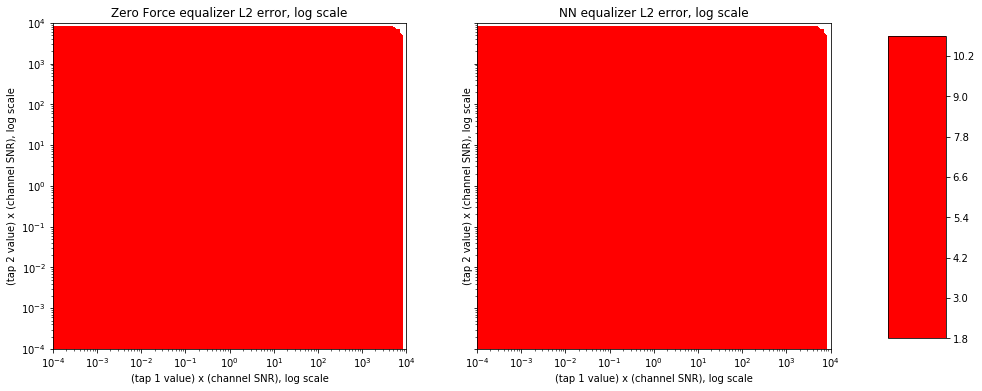

In [222]:

# generate heat plot for NN equalizer
n = 300 # number of channels
# m = 100 # number of tests for each SNR to be averaged

rad = np.linspace(0, 0.5*np.pi, n)
channels = np.vstack((np.cos(rad),np.sin(rad))).T
snrs = np.logspace(-4,4,20)

data_length=100
data_heat_map_orig = 2*np.random.randint(2,size=data_length)-1


channel_x,channel_y,errors_nninv = heat_map_inversion_error(data_heat_map_orig,channels,snrs)

# zfEqualize(channel_output, channel):

heat_plot(channel_x, channel_y, errors_nninv,errors_nninv)



# errors_nneq = train_eq_nn(data_length, channel_length, channel_train, data_train, data_train_orig,
#                channel_test,data_test, data_test_orig, errors_nneq)

In [208]:
x = np.zeros((100,1))

data_heat_map_orig-x

array([[-1.,  1., -1., ...,  1., -1.,  1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       ...,
       [-1.,  1., -1., ...,  1., -1.,  1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       [-1.,  1., -1., ...,  1., -1.,  1.]])